Nama    

```
# Ini diformat sebagai kode
```

 : Indah Dwi Susanti
Nim      : A11.2020.12732
Kelompok : 1
Kelas    : Sistem Temu Kembali Informasi A11.4707

data sms -> tokenisasi -> pembersihan data (normalisasi, stop words) -> BoW (Term Frequency / TF) -> DF -> IDF -> machine learning (random forest, knn)


Random forest = random decision tree + vote

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

nltk.download("stopwords")
nltk.download('punkt')
stop_words_indo = stopwords.words("indonesian") + list(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
stopwords.words("indonesian")

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
data = pd.read_csv("dataset_sms_spam_v1.csv")
data.sample(10)

,Teks,label
254,Ass. Maaf sy by hj.suri yang kemarin survey ru...,1
481,Selamat Nomor 3care Anda terpilih Mendptkan HA...,1
814,Iya liat mock up nya maksudnya,0
508,SLMT!!! NO anda m-dpt mobil AVANZA dr kartu AS...,1
808,Iya ih ko sedih sih gtau kapan lg ke bandung :(,0
1132,"yaudah, minta data dummy untuk diagnosa_pasien...",0
897,Maaf bu jadi jam berapa ya kita ketemuan bu......,0
51,Dapatkan EXTRA kuota 2GB 4G LTE dan EXTRA nelp...,2
861,kalo ngga besok ke kampus senin nama1 ke kamp...,0
1102,"Udah di beres2in, tp lampu depannya ada yg mat...",0


**Penjelasan Label**

0: sms normal

1: fraud atau penipuan

2: promo


**Catatan:**

Data dibersihkan dari  informasi pribadi. Nama diganti dengan "nama1"


Jumlah data: 1143

Jumlah per kelas:

0: 569

1: 335

2: 239

In [ ]:
data["label"].value_counts()

0    569
1    335
2    239
Name: label, dtype: int64

In [ ]:
# Import library yang diperlukan
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords

# Pastikan untuk menjalankan ini di Google Colab untuk mengunduh stopwords
nltk.download('stopwords')

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    # Mengubah ke huruf kecil
    return text.lower()

# Fungsi untuk menghapus stop words
def remove_stop_words(text, stop_words):
    words = text.split()
    return ' '.join(word for word in words if word not in stop_words)

# Fungsi untuk mencari kata yang paling sering muncul
def find_most_frequent_words(data, top_n=50):
    words = ' '.join(data).split()
    return pd.Series(words).value_counts().head(top_n)

# Membersihkan dataset
data['cleaned_text'] = data['Teks'].apply(clean_text)

# Mendapatkan stop words bahasa Indonesia
stop_words_id = set(stopwords.words('indonesian'))
data['text_no_stopwords'] = data['cleaned_text'].apply(lambda x: remove_stop_words(x, stop_words_id))

# Deskripsi label
label_descriptions = {
    0: "SMS Normal",
    1: "Fraud atau Penipuan",
    2: "Promo"
}

# Analisis frekuensi kata untuk setiap label
for label in sorted(data['label'].unique()):
    freq_words = find_most_frequent_words(data[data['label'] == label]['text_no_stopwords'])
    print(f"Label {label} ({label_descriptions[label]}):\n{freq_words}\n")

Label 0 (SMS Normal):
yg                 108
nama                93
aja                 69
ya                  66
ga                  55
nya                 49
kalo                38
jam                 38
teh                 30
udah                27
tp                  27
maaf                26
besok               25
pake                23
lg                  22
jg                  21
gak                 21
mah                 20
udh                 18
wkwk                18
jd                  17
gais                17
data                16
iya                 16
sih                 15
yah                 15
bu                  14
tau                 14
kosan               13
gt                  13
biar                13
kasih               13
pagi                13
blm                 12
gitu                11
nilai               11
mohon               11
dr                  10
pas                 10
guys                10
semoga              10
oke                 10
paket       

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


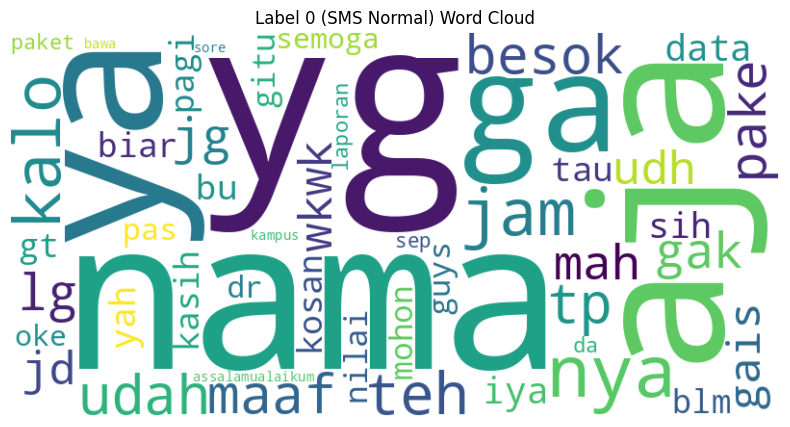

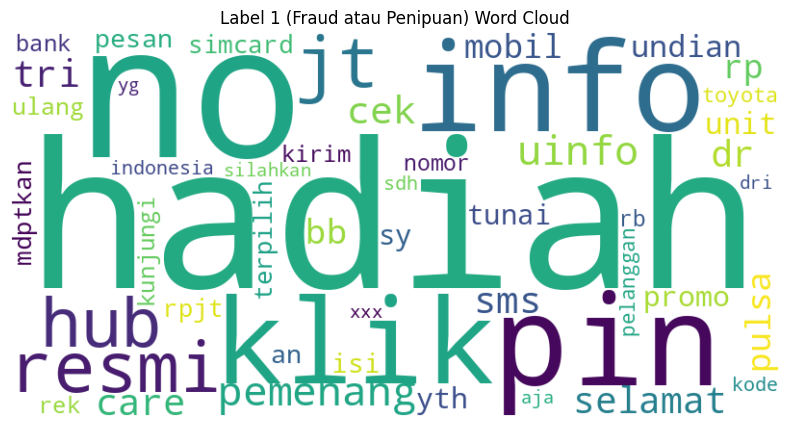

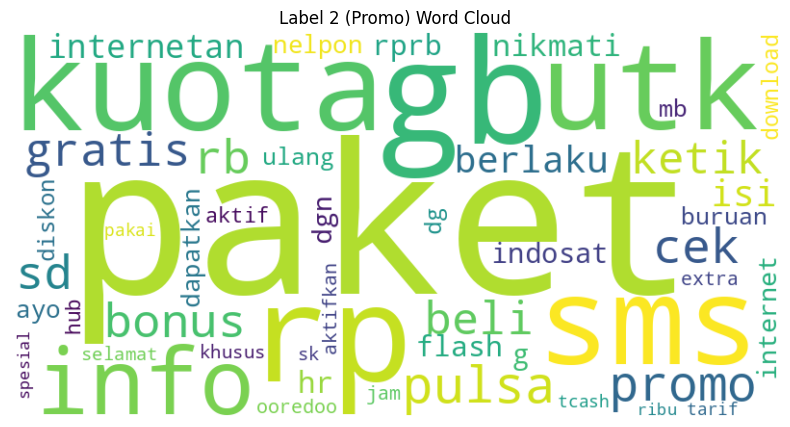

In [ ]:
# Import library yang diperlukan untuk word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk menghasilkan word cloud
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Menghasilkan word cloud untuk setiap label
for label in sorted(data['label'].unique()):
    freq_words = find_most_frequent_words(data[data['label'] == label]['text_no_stopwords'])
    generate_wordcloud(freq_words, f"Label {label} ({label_descriptions[label]}) Word Cloud")

In [ ]:
# Data Preprocessing

tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words_indo)
tfidf_matrix = tfidf.fit_transform(data["Teks"])
tfidf_matrix.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


(1143, 5070)

In [ ]:
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df

,'','nissan,'rp.100jt,'s,+10gb,+6281571xxxx,+6287820008358,+62xxxxxxxxxx,+777,+bonus,...,😂😂,😃😃,😆,😆👍,😊,😘,😟,😢,🙏,󾌹
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dataset splitting

X = tfidf_matrix
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 5070), (229, 5070), (914,), (229,))

In [ ]:
# Modeling
rf_classifier = RandomForestClassifier(n_estimators=200)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8864628820960698

In [ ]:
import joblib

# Simpan model ke file
joblib.dump(rf_classifier, 'spam_class.joblib')

['spam_class.joblib']

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        99
           1       0.97      0.80      0.88        82
           2       0.84      0.90      0.87        48

    accuracy                           0.89       229
   macro avg       0.89      0.88      0.88       229
weighted avg       0.89      0.89      0.89       229



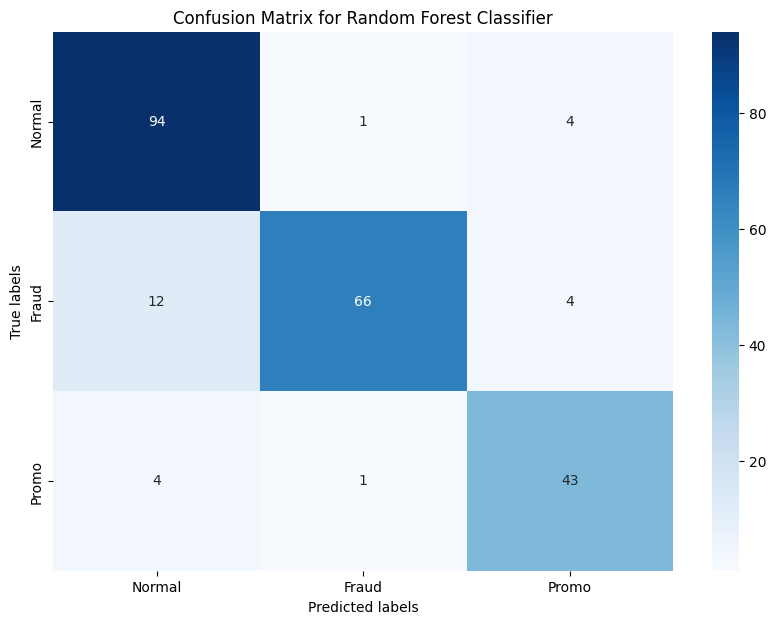

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud', 'Promo'], yticklabels=['Normal', 'Fraud', 'Promo'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
def predict_sms(sms, model, vectorizer):
    matrix = vectorizer.transform([sms])

    prediction = model.predict(matrix)

    label_map = {
        0: "0: sms normal",
        1: "1: fraud atau penipuan",
        2: "2: promo"
    }

    return label_map[prediction[0]]

In [ ]:
sample_sms = "Tolong isikan mama pulsa ke no ini"
predicted_category = predict_sms(sample_sms, rf_classifier, tfidf)
predicted_category

'1: fraud atau penipuan'

In [ ]:
sample_sms = "Halo, selamat malam"
predicted_category = predict_sms(sample_sms, rf_classifier, tfidf)
predicted_category

'0: sms normal'

In [ ]:
sample_sms = "2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat Anda yang terpilih. Aktifkan sekarang juga di *550*905#. Promo sd 30 Nov 2015.Buruan aktifkan sekarang. S&K"
predicted_category = predict_sms(sample_sms, rf_classifier, tfidf)
predicted_category

'2: promo'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Modeling
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_knn)
accuracy

0.8908296943231441

In [ ]:
cr = classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        99
           1       0.94      0.88      0.91        82
           2       0.77      0.96      0.85        48

    accuracy                           0.89       229
   macro avg       0.88      0.90      0.89       229
weighted avg       0.90      0.89      0.89       229



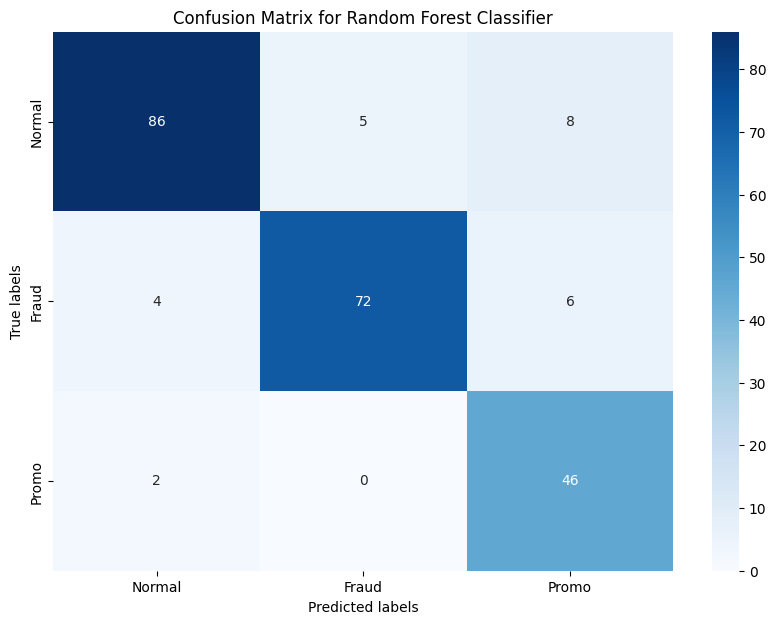

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Fraud', 'Promo'], yticklabels=['Normal', 'Fraud', 'Promo'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [ ]:
sample_sms = "Tolong isikan mama pulsa ke no ini"
predicted_category = predict_sms(sample_sms, knn, tfidf)
predicted_category

'1: fraud atau penipuan'

In [ ]:
# Laporan
# Sekarang, kita akan menganalisis statistik deskriptif dasar dari dataset.
descriptive_stats = data.describe(include=[object, 'category', 'number'])
descriptive_stats.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Teks,1143,1142,"bebas nama1, terus nanti kalau ada tgl libur, ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
label,1143.0,NaN,NaN,NaN,0.711286,0.790001,0.0,0.0,1.0,1.0,2.0
cleaned_text,1143,1140,promo beli paket flash mulai gb di my telkomse...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text_no_stopwords,1143,1139,promo beli paket flash gb my telkomsel app dpt...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghitung frekuensi setiap label
label_counts = data['label'].value_counts()

# Deskripsi singkat tentang dataset
data_info = data.info()

descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Teks               1143 non-null   object
 1   label              1143 non-null   int64 
 2   cleaned_text       1143 non-null   object
 3   text_no_stopwords  1143 non-null   object
dtypes: int64(1), object(3)
memory usage: 35.8+ KB


,Teks,label,cleaned_text,text_no_stopwords
count,1143,1143.000000,1143,1143
unique,1142,NaN,1140,1139
top,"bebas nama1, terus nanti kalau ada tgl libur, ...",NaN,promo beli paket flash mulai gb di my telkomse...,promo beli paket flash gb my telkomsel app dpt...
freq,2,NaN,2,2
mean,NaN,0.711286,NaN,NaN
std,NaN,0.790001,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN


In [ ]:
label_counts

0    569
1    335
2    239
Name: label, dtype: int64

In [ ]:
print(data_info)

None
